In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from matplotlib import font_manager, rc
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/(23-여름) LH 인구 예측 공모전/1.화성시_인구데이터_var1.0.0.xlsx")

In [5]:
df

,월별,행정기관,총인구,총인구_남,총인구_여,내국인,내국인_남,내국인_여,외국인,외국인_남,...,CB_3_BBB,BaseRate,실업률,CPI_F,CPI_C,CPI_H,CPI_HE,CPI_T,CPI_E,CPI_M
0,2014-01-01,화성시,561418,296851,264567,530567,273924,256643,30851,22927,...,9.019,2.50,3.2,85.705,93.172,89.865,95.224,110.321,94.986,86.312
1,2014-02-01,화성시,561970,297221,264749,530912,274128,256784,31058,23093,...,8.974,2.50,3.6,86.581,93.180,90.473,95.205,110.130,95.185,86.941
2,2014-03-01,화성시,563241,297929,265312,532001,274736,257265,31240,23193,...,8.994,2.50,3.4,86.810,93.310,90.681,95.260,110.050,95.900,87.724
3,2014-04-01,화성시,564807,298885,265922,533061,275361,257700,31746,23524,...,8.998,2.50,3.6,86.733,93.277,90.297,95.150,109.879,95.936,87.783
4,2014-05-01,화성시,566485,299882,266603,534076,275882,258194,32409,24000,...,8.957,2.50,3.5,86.741,93.740,91.030,95.196,109.749,95.973,88.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-12-01,화성시,961836,507737,454099,910814,473507,437307,51022,34230,...,11.173,3.25,3.1,113.490,107.560,108.950,101.070,113.350,102.750,111.180
108,2023-01-01,화성시,965932,509924,456008,914500,475330,439170,51432,34594,...,10.788,3.50,2.9,115.400,107.860,110.260,102.160,112.300,103.180,113.180
109,2023-02-01,화성시,971005,512632,458373,918865,477437,441428,52140,35195,...,10.631,3.50,2.6,115.840,107.940,111.100,102.290,111.490,103.410,113.420
110,2023-03-01,화성시,975106,514893,460213,922231,479113,443118,52875,35780,...,10.595,3.50,2.7,116.340,108.280,111.150,102.300,111.060,103.990,113.920


In [ ]:
df.shape

(112, 109)

In [ ]:
df.isna().sum()

월별        0
행정기관      0
총인구       0
총인구_남     0
총인구_여     0
         ..
CPI_H     0
CPI_HE    0
CPI_T     0
CPI_E     0
CPI_M     0
Length: 109, dtype: int64

In [3]:
df['year'] = df['월별'].dt.year
df['month'] = df['월별'].dt.month
df['day'] = df['월별'].dt.day

In [7]:
print(df['행정기관'].value_counts()) #행정기관 행 삭제
print(df.dtypes)  #나머지 변수 모두 numeric

화성시    112
Name: 행정기관, dtype: int64
월별       datetime64[ns]
행정기관             object
총인구               int64
총인구_남             int64
총인구_여             int64
              ...      
CPI_E           float64
CPI_M           float64
year              int64
month             int64
day               int64
Length: 112, dtype: object


In [8]:
df

,월별,행정기관,총인구,총인구_남,총인구_여,내국인,내국인_남,내국인_여,외국인,외국인_남,...,CPI_F,CPI_C,CPI_H,CPI_HE,CPI_T,CPI_E,CPI_M,year,month,day
0,2014-01-01,화성시,561418,296851,264567,530567,273924,256643,30851,22927,...,85.705,93.172,89.865,95.224,110.321,94.986,86.312,2014,1,1
1,2014-02-01,화성시,561970,297221,264749,530912,274128,256784,31058,23093,...,86.581,93.180,90.473,95.205,110.130,95.185,86.941,2014,2,1
2,2014-03-01,화성시,563241,297929,265312,532001,274736,257265,31240,23193,...,86.810,93.310,90.681,95.260,110.050,95.900,87.724,2014,3,1
3,2014-04-01,화성시,564807,298885,265922,533061,275361,257700,31746,23524,...,86.733,93.277,90.297,95.150,109.879,95.936,87.783,2014,4,1
4,2014-05-01,화성시,566485,299882,266603,534076,275882,258194,32409,24000,...,86.741,93.740,91.030,95.196,109.749,95.973,88.174,2014,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-12-01,화성시,961836,507737,454099,910814,473507,437307,51022,34230,...,113.490,107.560,108.950,101.070,113.350,102.750,111.180,2022,12,1
108,2023-01-01,화성시,965932,509924,456008,914500,475330,439170,51432,34594,...,115.400,107.860,110.260,102.160,112.300,103.180,113.180,2023,1,1
109,2023-02-01,화성시,971005,512632,458373,918865,477437,441428,52140,35195,...,115.840,107.940,111.100,102.290,111.490,103.410,113.420,2023,2,1
110,2023-03-01,화성시,975106,514893,460213,922231,479113,443118,52875,35780,...,116.340,108.280,111.150,102.300,111.060,103.990,113.920,2023,3,1


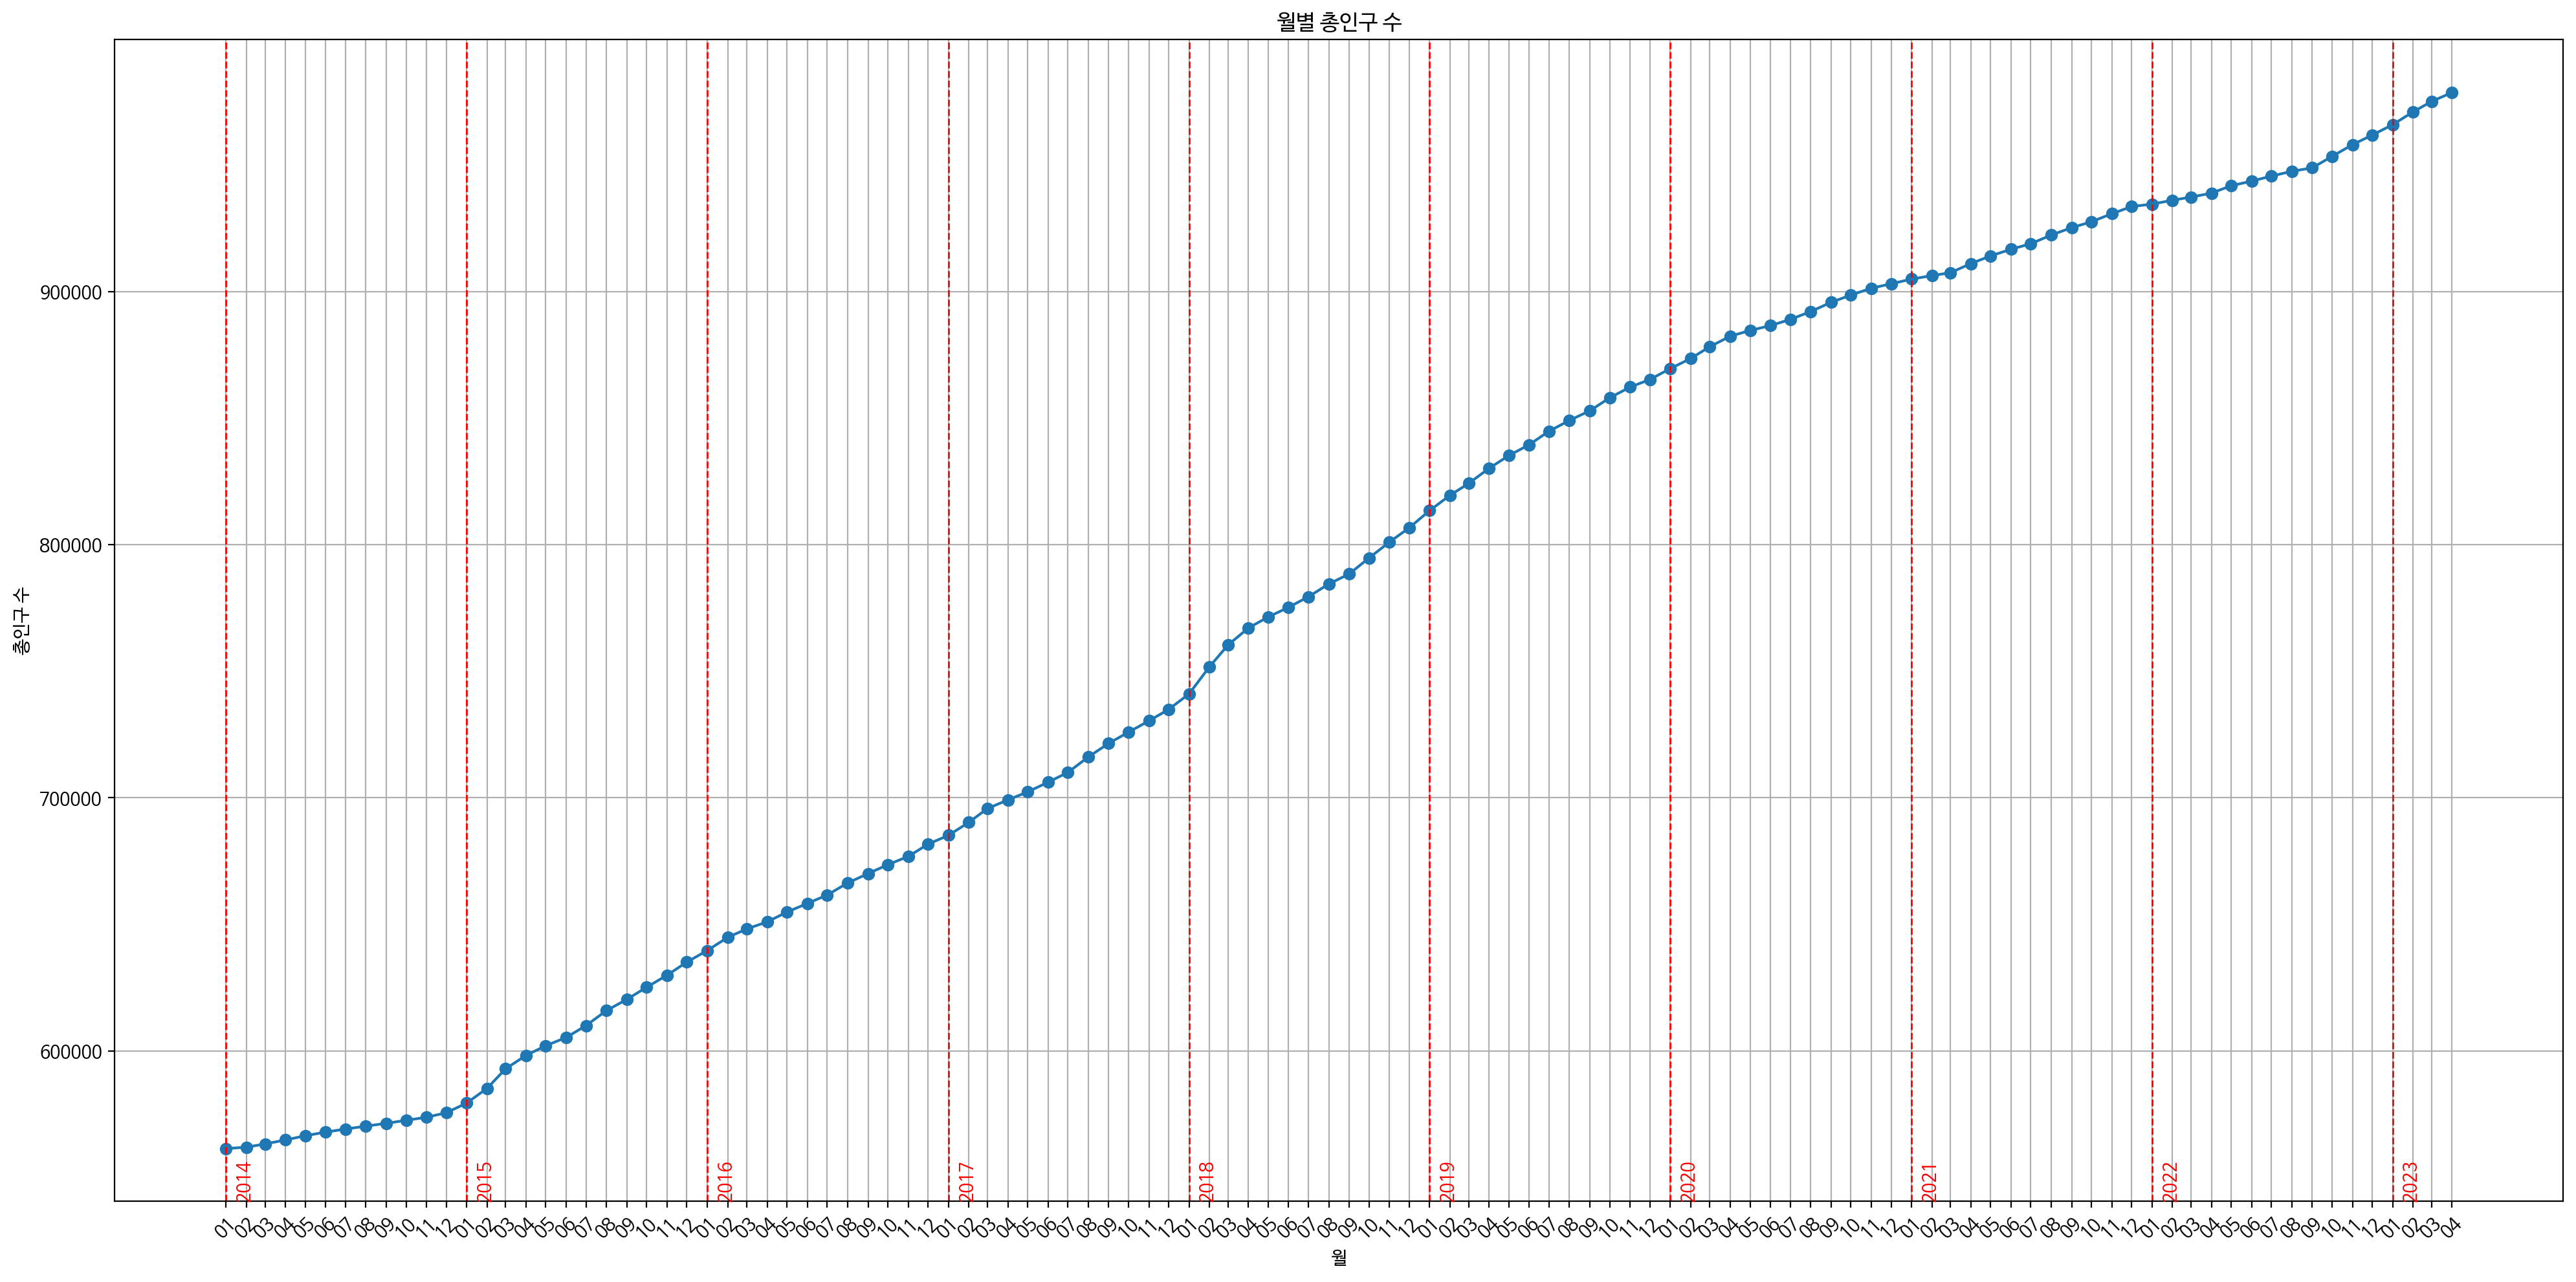

In [4]:
# 월별 총인구 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(df['월별'], df['총인구'], marker='o')
plt.title('월별 총인구 수')
plt.xlabel('월')
plt.ylabel('총인구 수')
plt.grid(True)

month_labels = df['월별'].dt.strftime('%m')
plt.xticks(df['월별'], labels=month_labels, rotation=45)

for year in range(df['월별'].min().year, df['월별'].max().year + 1):
    plt.axvline(pd.Timestamp(year=year, month=1, day=1), color='red', linestyle='--', linewidth=1)
    plt.text(pd.Timestamp(year=year, month=1, day=15), plt.gca().get_ylim()[0], str(year), color='red', rotation=90, verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [5]:
for year, group in df.groupby('year'):
    print(group['총인구'].iloc[0])

561418
579396
639666
685170
741061
813498
869559
904929
934545
965932


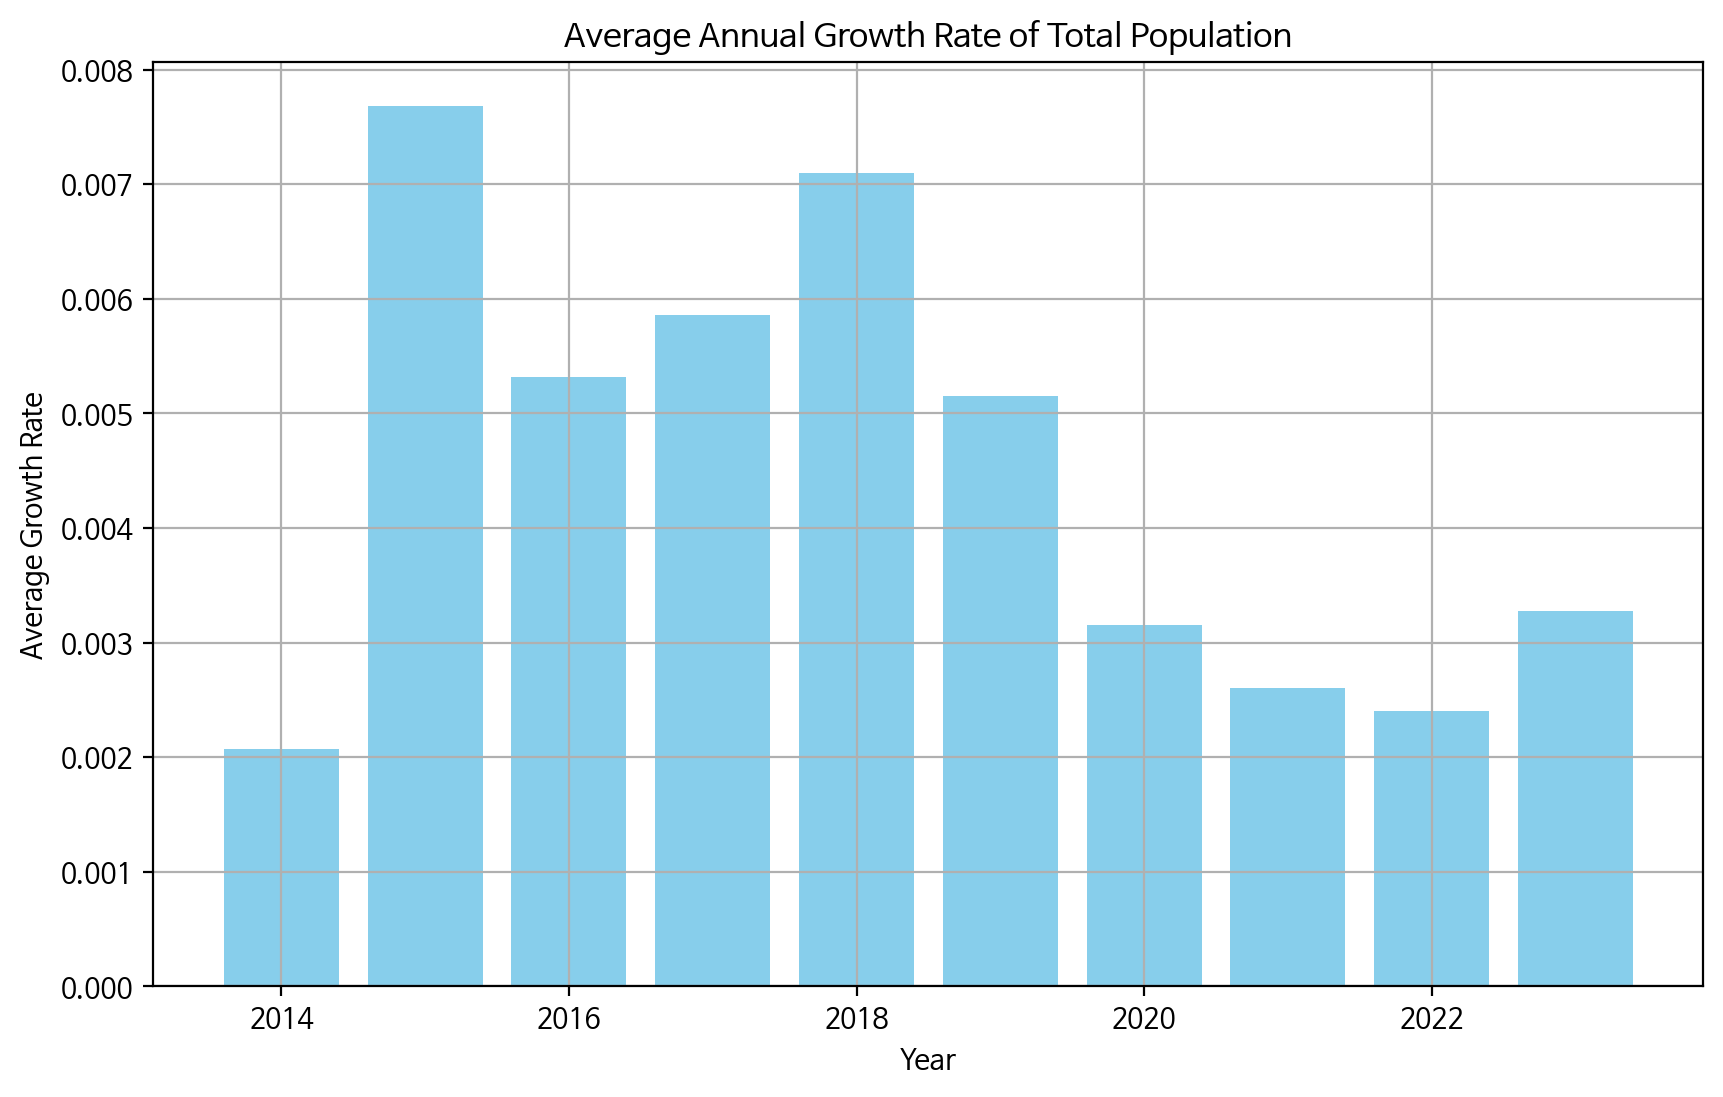

In [6]:
#cagr 공식(연평균 증가율)  #연평균 성장률을 연별 파생변수로?
# growth_rate = ((final_value / initial_value) ** (1 / num_years)) - 1
#
average_growth_rates = []
for year, group in df.groupby('year'):
    initial_value = group['총인구'].iloc[0]
    final_value = group['총인구'].iloc[-1]
    num_years = len(group)

    growth_rate = ((final_value / initial_value) ** (1 / num_years)) - 1
    average_growth_rates.append({'year': year, 'average_growth_rate': growth_rate})

result_df = pd.DataFrame(average_growth_rates)

plt.figure(figsize=(10, 6))
plt.bar(result_df['year'], result_df['average_growth_rate'], color='skyblue')
plt.title('Average Annual Growth Rate of Total Population')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate')
plt.grid(True)
plt.show()

In [11]:
df

,월별,행정기관,총인구,총인구_남,총인구_여,내국인,내국인_남,내국인_여,외국인,외국인_남,...,CPI_F,CPI_C,CPI_H,CPI_HE,CPI_T,CPI_E,CPI_M,year,month,day
0,2014-01-01,화성시,561418,296851,264567,530567,273924,256643,30851,22927,...,85.705,93.172,89.865,95.224,110.321,94.986,86.312,2014,1,1
1,2014-02-01,화성시,561970,297221,264749,530912,274128,256784,31058,23093,...,86.581,93.180,90.473,95.205,110.130,95.185,86.941,2014,2,1
2,2014-03-01,화성시,563241,297929,265312,532001,274736,257265,31240,23193,...,86.810,93.310,90.681,95.260,110.050,95.900,87.724,2014,3,1
3,2014-04-01,화성시,564807,298885,265922,533061,275361,257700,31746,23524,...,86.733,93.277,90.297,95.150,109.879,95.936,87.783,2014,4,1
4,2014-05-01,화성시,566485,299882,266603,534076,275882,258194,32409,24000,...,86.741,93.740,91.030,95.196,109.749,95.973,88.174,2014,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-12-01,화성시,961836,507737,454099,910814,473507,437307,51022,34230,...,113.490,107.560,108.950,101.070,113.350,102.750,111.180,2022,12,1
108,2023-01-01,화성시,965932,509924,456008,914500,475330,439170,51432,34594,...,115.400,107.860,110.260,102.160,112.300,103.180,113.180,2023,1,1
109,2023-02-01,화성시,971005,512632,458373,918865,477437,441428,52140,35195,...,115.840,107.940,111.100,102.290,111.490,103.410,113.420,2023,2,1
110,2023-03-01,화성시,975106,514893,460213,922231,479113,443118,52875,35780,...,116.340,108.280,111.150,102.300,111.060,103.990,113.920,2023,3,1


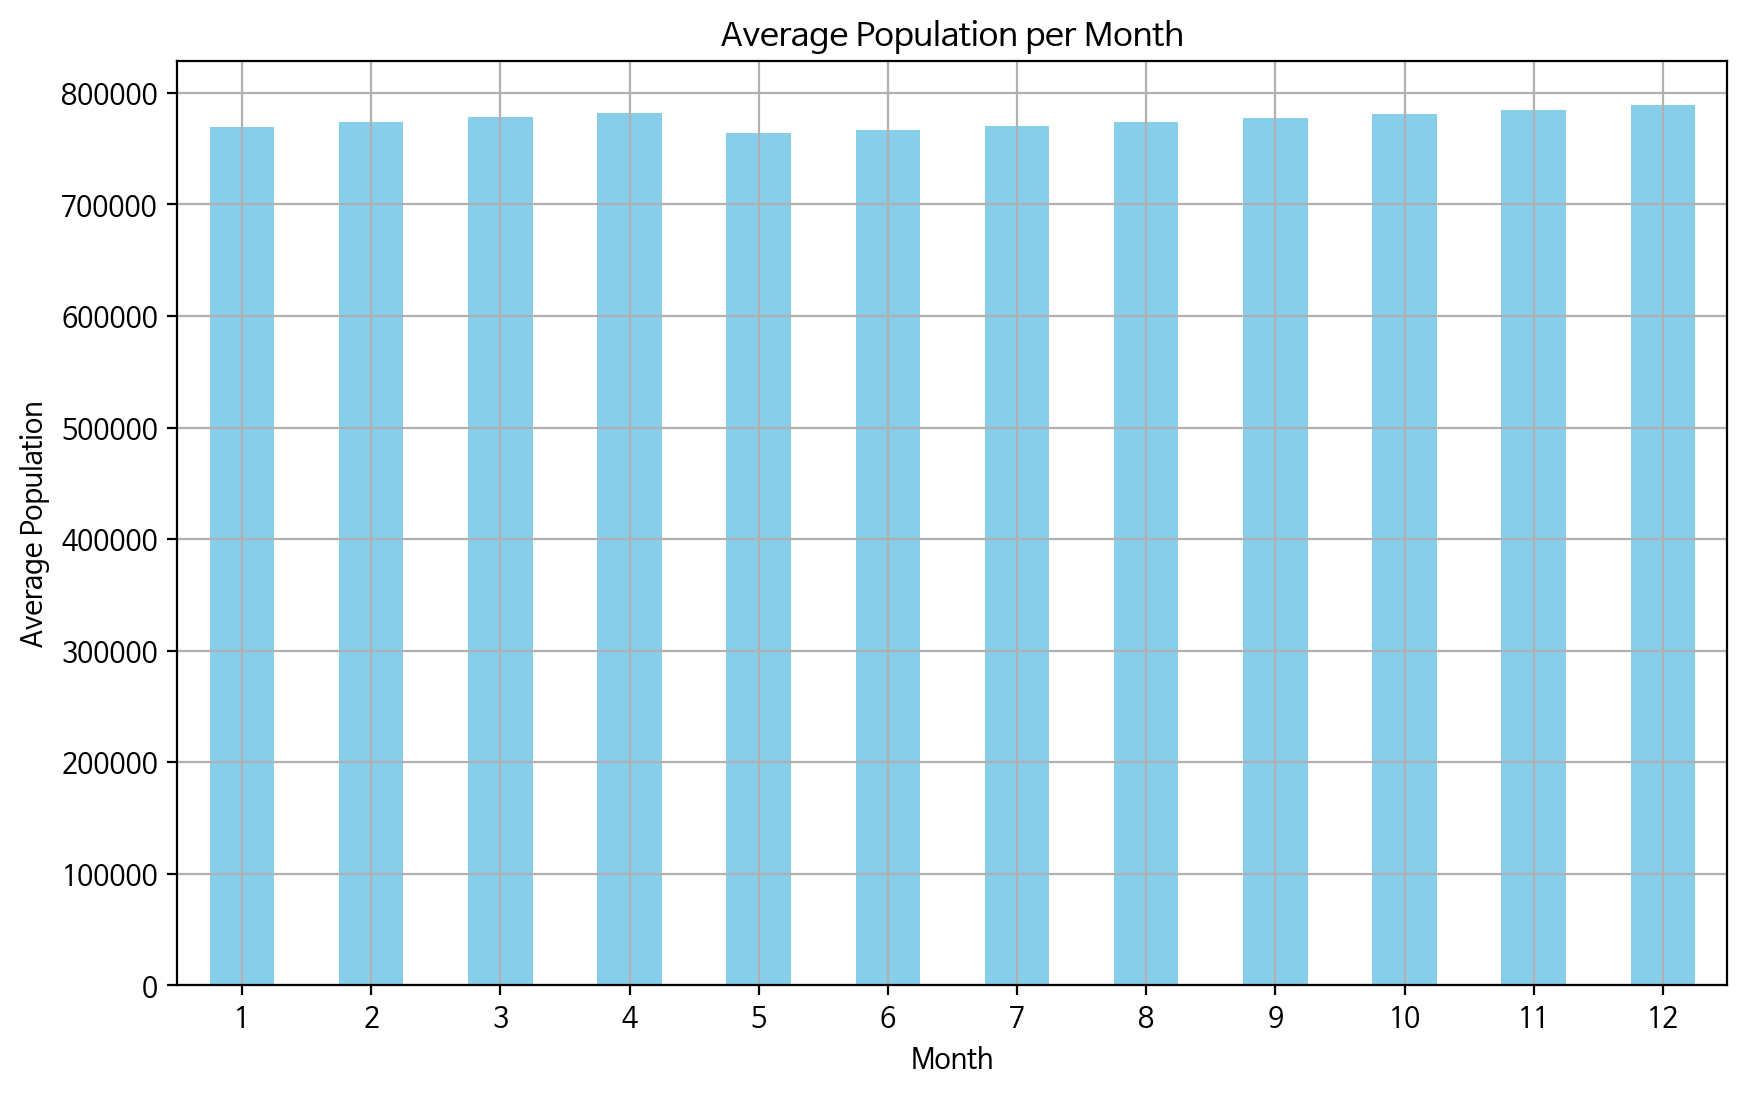

In [7]:
#월별 총인구의 평균은 큰 차이가 없

average_per_month = df.groupby(df['month'])['총인구'].mean()

# Plotting the average population per month
plt.figure(figsize=(10, 6))
average_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Population per Month')
plt.xlabel('Month')
plt.ylabel('Average Population')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


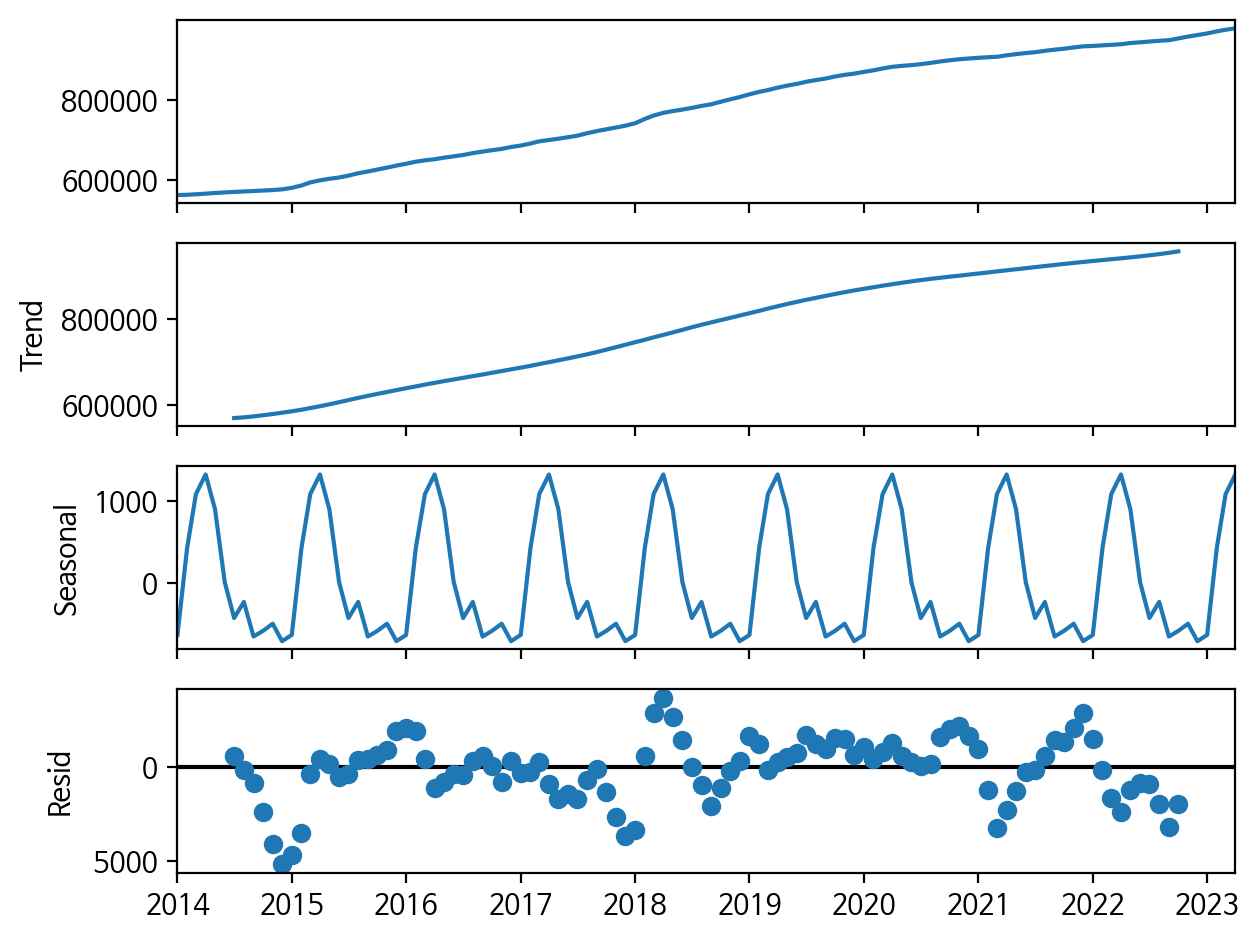

In [8]:
#시계열 분해
df_decompose=df[['월별','총인구']]
# Set the '월별' column as the index
df_decompose.set_index('월별', inplace=True)

# Perform seasonal decomposition
model_series = sm.tsa.seasonal_decompose(df_decompose, model='additive')

# Plot the decomposition components
fig = model_series.plot()
plt.show()

#맨 위는 observed
#Trend 우상향 선형적-> 이는 인구가 일정한 비율로 꾸준히 증가하고 있음을 보여준다.
#seasoonal 1년 주기로 계절성 있다.
#observed-trend+seasonal=residual
#해석 https://velog.io/@ljs7463/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98-%EA%B5%AC%EC%84%B1

In [14]:
#ADF를 통한 정상성 파악
def adf_test(x) :
  indices = ['Test Statistics', 'p-value', '# of Lags Used', '# of Observations Used']

  # AIC = 고려된 지연 수(lags)를 AIC(Akaike Information Criterion) 기반 자동 선택
  adf_test = adfuller(x, autolag = 'AIC')
  results = pd.Series(adf_test[0:4], index = indices)

  for key, value in adf_test[4].items() :
    results[f'Critical Value ({key})'] = value

  return results

In [15]:
 adf_test(df['총인구'])
 #귀무가설: 시계열이 정상성이 아니다.
 #귀무가설 기각할 수 없으므로 정상성 만족이 되지 않는다.

Test Statistics            -2.005571
p-value                     0.284136
# of Lags Used              8.000000
# of Observations Used    103.000000
Critical Value (1%)        -3.495493
Critical Value (5%)        -2.890037
Critical Value (10%)       -2.581971
dtype: float64

In [16]:
#인구증가율 파생변수 만들기
df['인구증가율'] = df['총인구'].pct_change() * 100
df['인구증가율'].iloc[0] = 0
df['인구증가율']

<ipython-input-16-b54dc89c00e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['인구증가율'].iloc[0] = 0


0      0.000000
1      0.098322
2      0.226169
3      0.278034
4      0.297093
         ...   
107    0.396540
108    0.425852
109    0.525192
110    0.422346
111    0.363755
Name: 인구증가율, Length: 112, dtype: float64

In [17]:
 adf_test(df['인구증가율']) #인구증가율 역시 정상성을 띠지 않는다.

Test Statistics            -1.971385
p-value                     0.299259
# of Lags Used              7.000000
# of Observations Used    104.000000
Critical Value (1%)        -3.494850
Critical Value (5%)        -2.889758
Critical Value (10%)       -2.581822
dtype: float64

# 정상성의 조정방법
1. 차분
2. 로그변환






#계절성 조정방법

1. 차분으로 조정 : 1차 차분을 사용하는 대신 월별 데이터에 연간 계절성이 있는 경우, 더 높은 차수를 사용한다.(ex. diff(12))

2. 모델링을 통한 조정
계절성을 직접 모델링한 후 계열에서 제거한다. seasonal_decompose나 다른 고급 가종 분해 알고리즘을 사용해 계절성분을 추출할 수 있다.
이 경우 Additive 모델을 사용할 때 계절 성분을 뺴야하고 모형이 Multiplicative일 경우 나눠야 한다.
또 다른 방식으로는 np.polyfit()을 사용해 선택한 시계열에 최적 차수의 다항식을 적합화한 다음, 원래 시계열에서 이를 빼낸다.

3. 박스 콕스 변환
다른 지수 변환 함수를 결합해 분포를 정규 분포와 더 유사하게 만든다.
scipy의 boxcox를 사용하면 가장 적합한 lambda 매개 변수 값을 자동으로 찾을 수 있다.
단 이때 시계열의 모든 값이 양수여야 한다. 1차 차분 혹은 변환을 통해 시계열에 음수 값이 나타나는 경우에 사용해서는 안된다.

4. pmdarima 라이브러리
통계검정을 사용해 정상성을 달성(계절적 정상성 제거)하기 위해 차분으로 조정하는 방식을 진행할 경우, 이 때 적용해야 할 차분의 차수를 알아낼 수 있는 두가지 함수 (ndiffs, nsdiffs)를 사용한다.
ADF, KPSS, 필립-페론 검정을 통해 정상성을 검사할 수 있고 그에 맞는 차분의 차수를 알 수 있다.

In [19]:
df

,월별,행정기관,총인구,총인구_남,총인구_여,내국인,내국인_남,내국인_여,외국인,외국인_남,...,CPI_C,CPI_H,CPI_HE,CPI_T,CPI_E,CPI_M,year,month,day,인구증가율
0,2014-01-01,화성시,561418,296851,264567,530567,273924,256643,30851,22927,...,93.172,89.865,95.224,110.321,94.986,86.312,2014,1,1,0.000000
1,2014-02-01,화성시,561970,297221,264749,530912,274128,256784,31058,23093,...,93.180,90.473,95.205,110.130,95.185,86.941,2014,2,1,0.098322
2,2014-03-01,화성시,563241,297929,265312,532001,274736,257265,31240,23193,...,93.310,90.681,95.260,110.050,95.900,87.724,2014,3,1,0.226169
3,2014-04-01,화성시,564807,298885,265922,533061,275361,257700,31746,23524,...,93.277,90.297,95.150,109.879,95.936,87.783,2014,4,1,0.278034
4,2014-05-01,화성시,566485,299882,266603,534076,275882,258194,32409,24000,...,93.740,91.030,95.196,109.749,95.973,88.174,2014,5,1,0.297093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-12-01,화성시,961836,507737,454099,910814,473507,437307,51022,34230,...,107.560,108.950,101.070,113.350,102.750,111.180,2022,12,1,0.396540
108,2023-01-01,화성시,965932,509924,456008,914500,475330,439170,51432,34594,...,107.860,110.260,102.160,112.300,103.180,113.180,2023,1,1,0.425852
109,2023-02-01,화성시,971005,512632,458373,918865,477437,441428,52140,35195,...,107.940,111.100,102.290,111.490,103.410,113.420,2023,2,1,0.525192
110,2023-03-01,화성시,975106,514893,460213,922231,479113,443118,52875,35780,...,108.280,111.150,102.300,111.060,103.990,113.920,2023,3,1,0.422346


In [13]:
#변수 간 관계 파악하기
##상관관계(선형관) or kl divergence

import pandas as pd
correlation_matrix = df.corr()

correlation_with_total_population = correlation_matrix['총인구']

top_correlations = correlation_with_total_population.drop('총인구').nlargest(50)

print("Top 20 Variables Highly Correlated with 총인구:")
print(top_correlations)

#총인구를 구성하는 인구, cpi,아파트,pi 등 전체적으로 상관성이 높

Top 20 Variables Highly Correlated with 총인구:
총인구_남                0.999985
총인구_여                0.999982
내국인_여                0.999929
내국인                  0.999863
내국인_남                0.999759
외국국적동포_여             0.996798
외국국적동포               0.988658
year                 0.988193
지가지수                 0.984003
외국인_여                0.982230
외국국적동포_남             0.973868
매매가격지수_아파트_서울        0.966876
CPI_HE               0.944014
CPI_H                0.937532
CPI_M                0.930324
외국인                  0.929786
PI_PA                0.921460
CPI_F                0.917847
등록외국인_여              0.915455
CPI_C                0.901097
PI_SI                0.889788
매매가격지수_아파트_수도권       0.882976
외국인_남                0.857467
CPI_E                0.837373
전세가격지수_아파트_서울        0.813176
매매가격지수_아파트_전국        0.802251
매매가격지수_아파트_6대광역시     0.799315
PI_P                 0.797475
사망자수                 0.796180
매매가격지수_아파트_5대광역시     0.794896
사망자수_남자              0.782476
매매가격지수_아파트_화성시       0.77

<ipython-input-13-1dc136b5cd89>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


전처리 시, residual plot을 보고 이상치를 제거하는 아이디어!

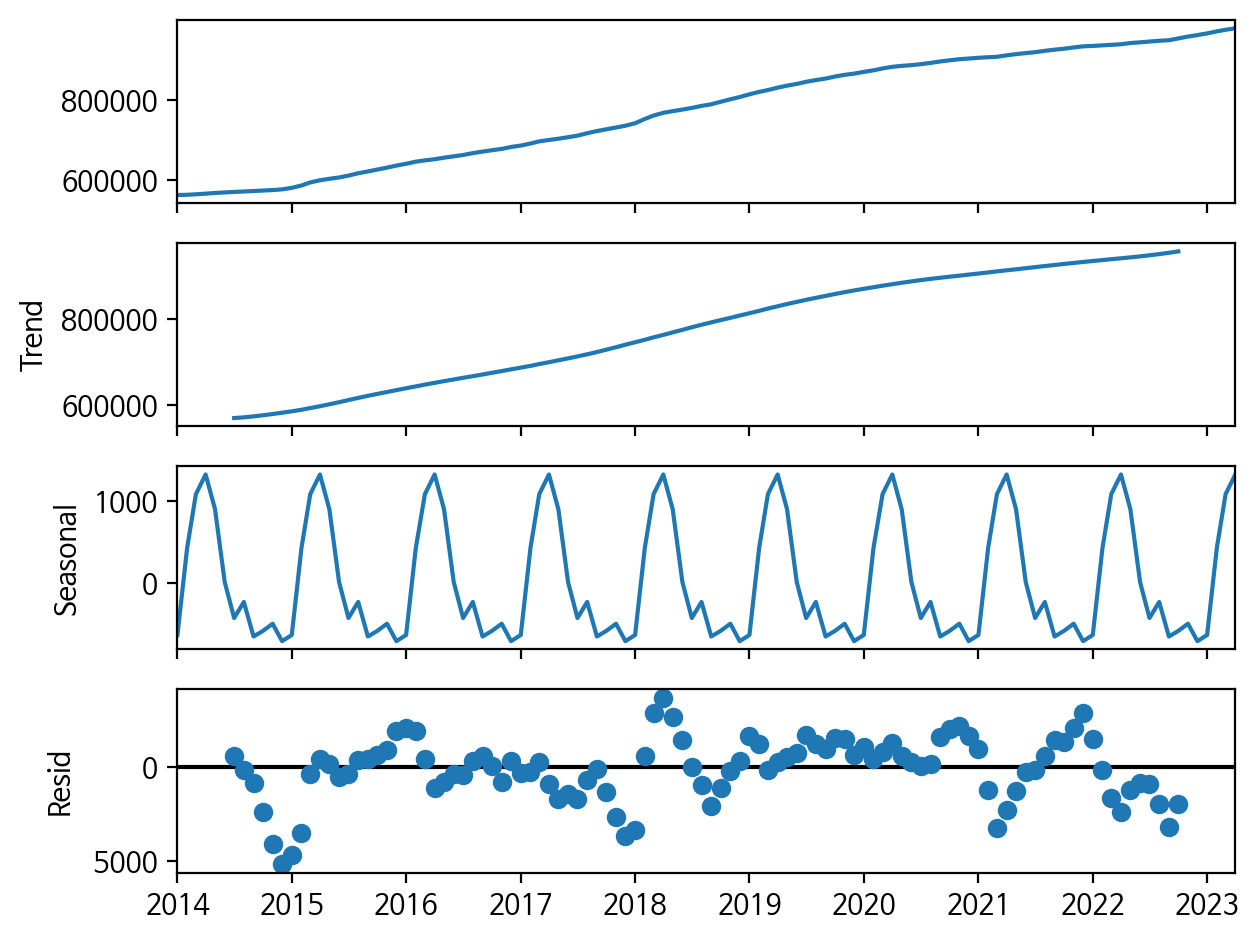

#데이콘 전처리 참고
https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent

In [ ]:
#변수 축소 방식이 필요하나? 행의 수가 많으니까
chatgpt


In [ ]:
######변수 설명##########

#월별
#행정기관
#총인구	##내국인 + 외국인
#총인구_남	#총인구_여
#내국인	#내국인_남	#내국인_여
#외국인	#외국인_남	#외국인_여   ##등록외국인 vs 외국국적동포
#등록외국인	#등록외국인_남	#등록외국인_여
#외국국적동포	#외국국적동포_남	#외국국적동포_여

#지가지수	#지가변동률_전국	#지가변동률_수도권	#지가변동률_지방	#지가변동률_대도시	#지가변동률_시지역	#지가변동률_군지역	#지가변동률_화성시
#매매가격지수_아파트_전국	#매매가격지수_아파트_수도권	#매매가격지수_아파트_지방권	#매매가격지수_아파트_6대광역시	#매매가격지수_아파트_5대광역시	#매매가격지수_아파트_9개도	#매매가격지수_아파트_8개도	#매매가격지수_아파트_서울	#매매가격지수_아파트_화성시
#매매가격변동률_아파트_전국	#매매가격변동률_아파트_수도권	#매매가격변동률_아파트_지방권	#매매가격변동률_아파트_6대광역시	#매매가격변동률_아파트_5대광역시	#매매가격변동률_아파트_9개도	#매매가격변동률_아파트_8개도	#매매가격변동률_아파트_서울	매매가격변동률_아파트_화성시
#전세가격지수_아파트_전국	#전세가격지수_아파트_수도권	#전세가격지수_아파트_지방권	#전세가격지수_아파트_6대광역시	#전세가격지수_아파트_5대광역시	#전세가격지수_아파트_9개도	#전세가격지수_아파트_8개도	#전세가격지수_아파트_서울	#전세가격지수_아파트_화성시	#전세가격변동률_아파트_전국
#전세가격변동률_아파트_수도권	#전세가격변동률_아파트_지방권	#전세가격변동률_아파트_6대광역시	#전세가격변동률_아파트_5대광역시	#전세가격변동률_아파트_9개도	#전세가격변동률_아파트_8개도	#전세가격변동률_아파트_서울	#전세가격변동률_아파트_화성시
#월세가격지수_아파트_전국	#월세가격지수_아파트_수도권	#월세가격지수_아파트_지방권	#월세가격지수_아파트_6대광역시	#월세가격지수_아파트_5대광역시	#월세가격지수_아파트_9개도	#월세가격지수_아파트_8개도	#월세가격지수_아파트_서울	#월세가격지수_아파트_화성시
#월세가격변동률_아파트_전국	#월세가격변동률_아파트_수도권	#월세가격변동률_아파트_지방권	#월세가격변동률_아파트_6대광역시	#월세가격변동률_아파트_5대광역시	#월세가격변동률_아파트_9개도	#월세가격변동률_아파트_8개도	#월세가격변동률_아파트_서울	#월세가격변동률_아파트_화성시
#총전입	#총전출	#순이동
#출생자수	#출생자수_남자	#출생자수_여자
#사망자수	#사망자수_남자	#사망자수_여자
#PI_P	#PI_C	#PI_SI	#PI_PA
#CD
#CP
#YT_1	#YT_3	#YT_5	#YT_10
#CB_3_AA	#CB_3_BBB
#BaseRate	#실업률
#CPI_F	#CPI_C	#CPI_H	#CPI_HE	#CPI_T	#CPI_E	#CPI_M

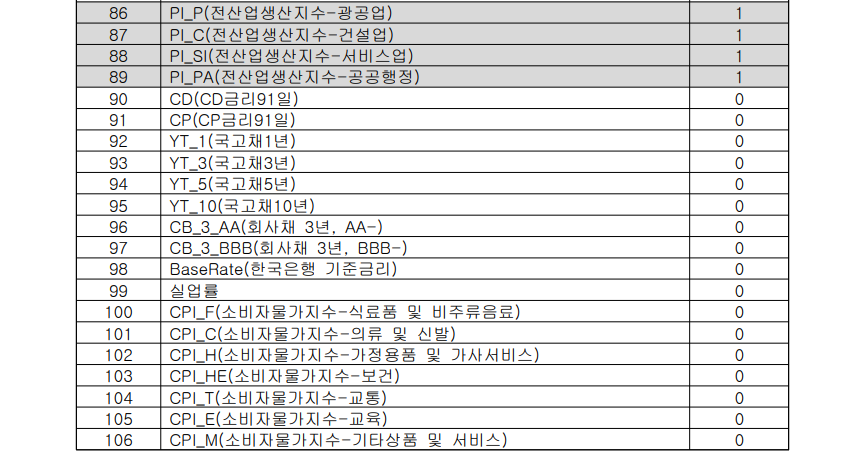